## testing the torch dataset object for the new datasets

In [1]:
%load_ext autoreload

In [5]:
%autoreload

In [6]:
from twaibrain.braintorch.data import SingleVisitDataset_V1, MultiIndependentVisitDataset_V1, SitkImageDataset_V1, RandomSubjectVisitDataset_V1, SingleVisitDatasetInRam_V1, MultiIndependentVisitDatasetInRam_V1, RandomSubjectVisitDatasetInRam_V1
import matplotlib.pyplot as plt
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm

In [7]:
lbc_val = SingleVisitDatasetInRam_V1(
        dataset_folder="/home/s2208943/preprocessed_data/",#"/workspace/writeable/datasets/preprocessed_data",
        config_name="policyproblem_train",
        ds_name="LBC",
        visit_key="ses",
        ds_experiment_name='',
        split='val',
        resample=True,
        out_spacing=[1,1,2],
        fit_to_mask=True,
        mask_pad=0,
        fit_to_shape=True,
        output_shape=[80,192,160]
                           )

100%|███████████████████████████████████████████████████████████████| 69/69 [00:16<00:00,  4.11it/s]


In [ ]:
lbc_train = RandomSubjectVisitDatasetInRam_V1(
        dataset_folder="/home/s2208943/preprocessed_data/",#"/workspace/writeable/datasets/preprocessed_data",
        config_name="policyproblem_train",
        ds_name="LBC",
        visit_key="ses",
        ds_experiment_name='',
        split='train',
        resample=True,
        out_spacing=[1,1,2],
        fit_to_mask=True,
        mask_pad=0,
        fit_to_shape=True,
        output_shape=[80,192,160]
                           )

In [74]:
5 * 2**4

80

In [ ]:
80, 192, 160

In [61]:
maxz, maxx, maxy

(79, 188, 149)

In [20]:
lbc_sitk = SitkImageDataset_V1(
        dataset_folder="/home/s2208943/preprocessed_data/",#"/workspace/writeable/datasets/preprocessed_data",
        config_name="policyproblem_test",
        ds_name="LBC",
        visit_key="ses",
        ds_experiment_name='',
        split='test',
)

lmslsc_sitk = SitkImageDataset_V1(
        dataset_folder="/home/s2208943/preprocessed_data/",
        config_name="policyproblem_test",
        ds_name="LMSLSC",
        visit_key="ses",
        ds_experiment_name='',
        split='test',
)

mss2_sitk = SitkImageDataset_V1(
        dataset_folder="/home/s2208943/preprocessed_data/",
        config_name="policyproblem_test",
        ds_name="MSS2",
        visit_key="ses",
        ds_experiment_name='',
        split='test',
)

mss3_sitk = SitkImageDataset_V1(
        dataset_folder="/home/s2208943/preprocessed_data/",
        config_name="policyproblem_test",
        ds_name="MSS3",
        visit_key="ses",
        ds_experiment_name='wmhedited',
        split='test',
)

msseg_sitk = SitkImageDataset_V1(
        dataset_folder="/home/s2208943/preprocessed_data/",
        config_name="policyproblem_test",
        ds_name="MSSEG",
        visit_key="ses",
        ds_experiment_name='',
        split='test',
)

shiftsms_sitk = SitkImageDataset_V1(
        dataset_folder="/home/s2208943/preprocessed_data/",
        config_name="policyproblem_test",
        ds_name="ShiftsMS",
        visit_key="ses",
        ds_experiment_name='',
        split='test',
)

wmhchallenge_sitk = SitkImageDataset_V1(
        dataset_folder="/home/s2208943/preprocessed_data/",
        config_name="policyproblem_test",
        ds_name="WMHChallenge",
        visit_key="ses",
        ds_experiment_name='raterConsensus',
        split='test',
)

In [39]:
spacing_details = {
    "dataset":[],
    "x_mm":[],
    "y_mm":[],
    "z_mm":[],
    "x_vox":[],
    "y_vox":[],
    "z_vox":[]
    
}

for ds in [lmslsc_sitk, mss2_sitk, mss3_sitk, msseg_sitk, shiftsms_sitk, wmhchallenge_sitk, lbc_sitk]:
    print(ds.ds_name)
    for data in tqdm(ds, ncols=100, total=len(ds)):
        # print(data.keys())
        # break
        flair_img = data['FLAIR']
        spacing = flair_img.GetSpacing()
        size = flair_img.GetSize()
        spacing_details['dataset'].append(ds.ds_name)
        spacing_details['x_mm'].append(spacing[0])
        spacing_details['y_mm'].append(spacing[1])
        spacing_details['z_mm'].append(spacing[2])
        spacing_details['x_vox'].append(size[0])
        spacing_details['y_vox'].append(size[1])
        spacing_details['z_vox'].append(size[2])
    # break

LMSLSC


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.97it/s]


MSS2


100%|█████████████████████████████████████████████████████████████| 188/188 [00:06<00:00, 30.57it/s]


MSS3


100%|█████████████████████████████████████████████████████████████| 229/229 [01:04<00:00,  3.58it/s]


MSSEG


100%|███████████████████████████████████████████████████████████████| 53/53 [00:52<00:00,  1.00it/s]


ShiftsMS


100%|███████████████████████████████████████████████████████████████| 46/46 [00:15<00:00,  2.92it/s]


WMHChallenge


100%|█████████████████████████████████████████████████████████████| 170/170 [00:13<00:00, 12.50it/s]


LBC


100%|█████████████████████████████████████████████████████████████| 689/689 [01:00<00:00, 11.39it/s]


In [40]:
wmhchallenge_sitk[0]['FLAIR'].GetSpacing()

(1.300046682357788, 1.2108999490737915, 3.0)

In [42]:
spacing_df = pd.DataFrame(spacing_details)

In [43]:
spacing_df

,dataset,x_mm,y_mm,z_mm,x_vox,y_vox,z_vox
0,LMSLSC,1.0,1.0,1.0,181,217,181
1,LMSLSC,1.0,1.0,1.0,181,217,181
2,LMSLSC,1.0,1.0,1.0,181,217,181
3,LMSLSC,1.0,1.0,1.0,181,217,181
4,LMSLSC,1.0,1.0,1.0,181,217,181
...,...,...,...,...,...,...,...
1375,LBC,1.0,1.0,2.0,256,256,80
1376,LBC,1.0,1.0,2.0,256,256,80
1377,LBC,1.0,1.0,2.0,256,256,80
1378,LBC,1.0,1.0,2.0,256,256,80


In [ ]:
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

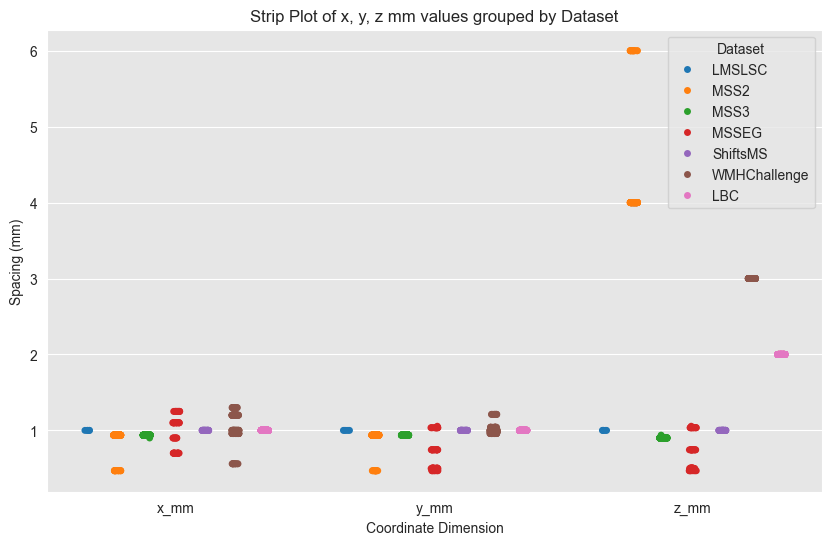

In [49]:
# Transform DataFrame for seaborn stripplot
df_melted = spacing_df.melt(id_vars=["dataset"], value_vars=["x_mm", "y_mm", "z_mm"], 
                     var_name="Dimension", value_name="Value")

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_melted, x="Dimension", y="Value", hue="dataset", jitter=True, dodge=True)

# Improve plot readability
plt.xlabel("Coordinate Dimension")
plt.ylabel("Spacing (mm)")
plt.title("Strip Plot of x, y, z mm values grouped by Dataset")
plt.legend(title="Dataset")
plt.show()

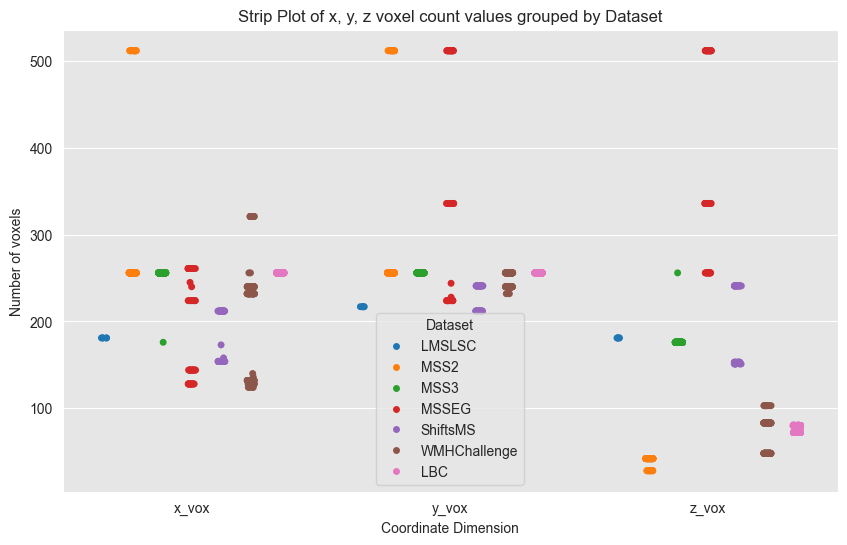

In [48]:
# Transform DataFrame for seaborn stripplot
df_melted = spacing_df.melt(id_vars=["dataset"], value_vars=["x_vox", "y_vox", "z_vox"], 
                     var_name="Dimension", value_name="Value")

# Create the strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_melted, x="Dimension", y="Value", hue="dataset", jitter=True, dodge=True)

# Improve plot readability
plt.xlabel("Coordinate Dimension")
plt.ylabel("Number of voxels")
plt.title("Strip Plot of x, y, z voxel count values grouped by Dataset")
plt.legend(title="Dataset")
plt.show()

### notes:
based on this, for now, I have moved on to output sizes of [80, 192, 160] (z first) and resample to [1, 1, 2] (z last) spacing. for the MS only models, this may not be a prudent idea

an alternative may be to not resample the images at all, and essentially treat brains as 160, 192, 160 in 1,1,1 dim and then go from there, or to impose a minimum spacing...


there are complexities here and the code will need to be modified if we arrange some kind of dynamic spacing procedure...